In [40]:
import neurolab as nl
import numpy as np
import numpy.matlib
from neupy import algorithms
from scipy.spatial import distance
import pylab as pl
from sklearn.metrics import mean_squared_error

### 1 задание

Использовать сеть Элмана для распознавания динамических образов.

In [41]:
p1_k = np.linspace(0, 1, int(1 / 0.025), endpoint=True)

# Основной сигнал
p1 = np.sin(4 * np.pi * p1_k)

t1 = np.ones(len(p1_k)) * (-1)


p2_k = np.linspace(2.16, 4.04, int(4.04 / 0.025), endpoint=True)

# Сигнал, подлежащий распознаванию
p2 = np.cos(np.cos(p2_k) * p2_k * p2_k + 5 * p2_k)

t2 = np.ones(len(p2_k))

# Длительность основного сигнала
R = np.array([1, 4, 7])

In [42]:
p2 = p2.reshape(1, p2.shape[0])
t2 = t2.reshape(1, t2.shape[0])

Определяем входное множество

In [43]:
P = np.concatenate((numpy.matlib.repmat(p1, 1, R[0]), p2,
                    numpy.matlib.repmat(p1, 1, R[1]), p2,
                    numpy.matlib.repmat(p1, 1, R[2]), p2), axis=1).reshape(-1, 1)

T = np.concatenate((numpy.matlib.repmat(t1, 1, R[0]), t2,
                    numpy.matlib.repmat(t1, 1, R[1]), t2,
                    numpy.matlib.repmat(t1, 1, R[2]), t2), axis=1).reshape(-1, 1)

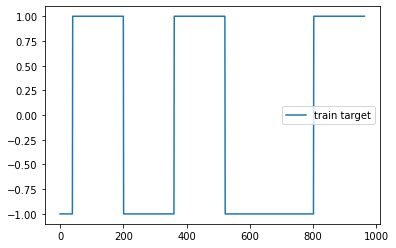

In [44]:
pl.plot(T.reshape(T.shape[0]))
#pl.plot(output.reshape(output.shape[0]))
pl.legend(['train target', 'net output'])
pl.show()

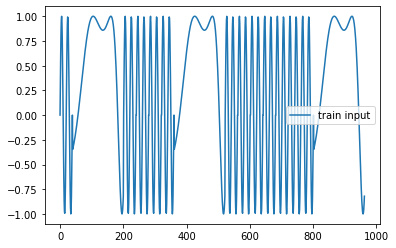

In [45]:
pl.plot(P.reshape(P.shape[0]))
#pl.plot(output.reshape(output.shape[0]))
pl.legend(['train input'])
pl.show()

In [46]:
# Create network with 2 layers
net = nl.net.newelm([[-10, 10]], [8, 1], [nl.trans.TanSig(), nl.trans.TanSig()])
# Set initialized functions and init
net.layers[0].np['w'][:] = 1 # set weight for all input neurons to 1
net.layers[0].np['b'][:] = 0 # set bias for all input neurons to 0
net.init()

Обучаем сеть и вычисляем метрики обучения, ошибка MSE.

In [47]:
# Train network, error - MSE
error = net.train(P, T, epochs=250, show=10, goal=0.01)

Epoch: 10; Error: 1.5711556535514803;
Epoch: 20; Error: 1.2426925500339456;
Epoch: 30; Error: 1.211242366349311;
Epoch: 40; Error: 1.0848345487858098;
Epoch: 50; Error: 0.8855963018370351;
Epoch: 60; Error: 0.6008078162832127;
Epoch: 70; Error: 1.0102309767345508;
Epoch: 80; Error: 0.6711832714321038;
Epoch: 90; Error: 0.8149906825562684;
Epoch: 100; Error: 0.7035481650992048;
Epoch: 110; Error: 0.5593394846769956;
Epoch: 120; Error: 0.4477189626059321;
Epoch: 130; Error: 0.802341722374774;
Epoch: 140; Error: 0.6965478113436677;
Epoch: 150; Error: 0.5123963064875373;
Epoch: 160; Error: 0.4862388881338947;
Epoch: 170; Error: 0.21276157354134617;
Epoch: 180; Error: 0.10329712830763077;
Epoch: 190; Error: 0.057037748690530396;
Epoch: 200; Error: 0.6518900237117701;
Epoch: 210; Error: 0.5827948115785673;
Epoch: 220; Error: 0.6008163071272878;
Epoch: 230; Error: 0.5646278503311233;
Epoch: 240; Error: 0.6310484466274572;
Epoch: 250; Error: 0.7760708071608347;
The maximum number of train epoc

In [48]:
# Simulate network
output = net.sim(P)

Отобразим ошибку обучения на графике

Text(0, 0.5, 'Train error (MSE)')

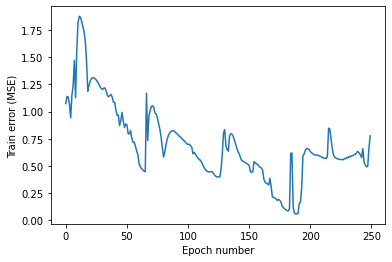

In [49]:
pl.plot(error)
pl.xlabel('Epoch number')
pl.ylabel('Train error (MSE)')

Отобразим на графике этаонные значения и предсказанные сетью.

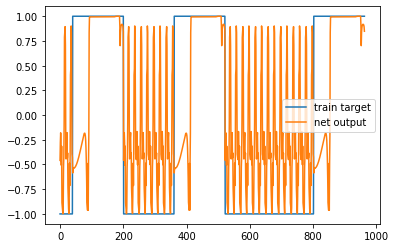

In [50]:
pl.plot(T.reshape(T.shape[0]))
pl.plot(output.reshape(output.shape[0]))
pl.legend(['train target', 'net output'])
pl.show()

Преобразуем предсказанные значения.

In [51]:
output[output >= 0] = 1.0
output[output < 0] = -1.0

In [52]:
MSE = mean_squared_error(T, output)
print('MSE = {}'.format(MSE))
print('RMSE = {}'.format(np.sqrt(MSE)))

MSE = 1.0965732087227413
RMSE = 1.0471739152226536


Для проверки качества распознавания сформируем новое обучающее множество, изменив одно из значений R.

In [53]:
p1_k = np.linspace(0, 1, int(1 / 0.025), endpoint=True)

# Основной сигнал
p1 = np.sin(4 * np.pi * p1_k)

t1 = np.ones(len(p1_k)) * (-1)


p2_k = np.linspace(2.16, 4.04, int(4.04 / 0.025), endpoint=True)

# Сигнал, подлежащий распознаванию
p2 = np.cos(np.cos(p2_k) * p2_k * p2_k + 5 * p2_k)

t2 = np.ones(len(p2_k))

# Длительность основного сигнала
R = np.array([1, 4, 12])

In [54]:
p2 = p2.reshape(1, p2.shape[0])
t2 = t2.reshape(1, t2.shape[0])

P2 = np.concatenate((numpy.matlib.repmat(p1, 1, R[0]), p2,
                    numpy.matlib.repmat(p1, 1, R[1]), p2,
                    numpy.matlib.repmat(p1, 1, R[2]), p2), axis=1).reshape(-1, 1)

T2 = np.concatenate((numpy.matlib.repmat(t1, 1, R[0]), t2,
                    numpy.matlib.repmat(t1, 1, R[1]), t2,
                    numpy.matlib.repmat(t1, 1, R[2]), t2), axis=1).reshape(-1, 1)

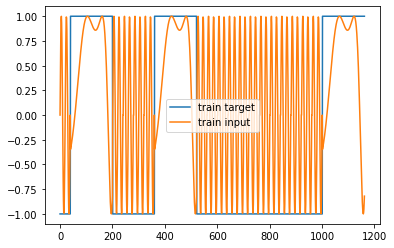

In [55]:
pl.plot(T2.reshape(T2.shape[0]))
pl.plot(P2.reshape(P2.shape[0]))
pl.legend(['train target', 'train input'])
pl.show()

In [56]:
# Simulate network
output2 = net.sim(P2)

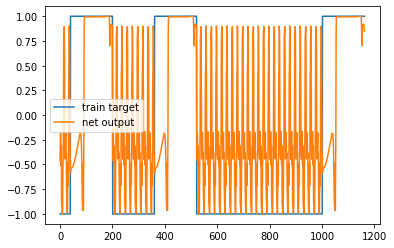

In [57]:
pl.plot(T2.reshape(T2.shape[0]))
pl.plot(output2.reshape(output2.shape[0]))
pl.legend(['train target', 'net output'])
pl.show()

### 2 задание

Использовать сеть Хопфилда для распознавания статических образов.

В соответствие с 7 вариантом цифры определились следующим образом: $[3, 1, 0]$

Матрица одной цифры $[10$ x $12]$, где 10 - ширина, 12 - высота

In [58]:
zero = np.matrix([
               0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
               0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
               0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
       
one = np.matrix([
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0])
       
two = np.matrix([
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0])
    
three = np.matrix([
                0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
                0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
                0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 0, 1, 1, 1, 1, 1, 1, 0, 0])
       
four = np.matrix([
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

six = np.matrix([
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
                1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
                1, 0, 0, 0, 0, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
                1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
                1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
                1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0])
       
nine = np.matrix([
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
                0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [59]:
data = np.concatenate([three, one, zero], axis=0)

dhnet = algorithms.DiscreteHopfieldNetwork(mode = 'async', n_times = 600)
dhnet.train(data)

Подаем в сеть первый образ.

In [60]:
result = dhnet.predict(three)

Результат распознавания

In [61]:
def DrawBinImage(img):
    for row in img.tolist():
        print(' '.join(' #'[val] for val in row))

In [62]:
DrawBinImage(three.reshape(12,10))

    # # # # # #    
    # # # # # # #  
              # #  
              # #  
              # #  
        # # # #    
        # # # #    
              # #  
              # #  
              # #  
    # # # # # # #  
    # # # # # #    


In [63]:
DrawBinImage(result.reshape(12, 10))

    # # # # # #    
    # # # # # # #  
              # #  
              # #  
              # #  
        # # # #    
        # # # #    
              # #  
              # #  
              # #  
    # # # # # # #  
    # # # # # #    


In [64]:
def Noise(img, noisePercent):
    limit = img.shape[1]
    tmp = img.T
    
    for i in range(noisePercent):
        pos = np.random.randint(1, limit, 1)[0]
        tmp[pos] *= 0
    res = tmp.T
    return res

Зашумление второго образа на 20%

In [65]:
noiseOne = Noise(one, 20)
DrawBinImage(noiseOne.reshape(12, 10))

      #   # #      
      # #   #      
      # #   #      
        #   #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
        # # #      
      # # # #      
      # # #        


Подаем второй зашумленный образ в сеть

In [66]:
result2 = dhnet.predict(noiseOne)
DrawBinImage(result2.reshape(12, 10))

      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      


Зашумление третьего образа на 30%

In [67]:
noiseZero = Noise(zero, 30)
DrawBinImage(noiseZero.reshape(12, 10))

                   
      #     #      
    # # #   # #    
  #   #       # #  
  # # #     # # #  
    # #            
      #       # #  
  #   #     # #    
    # #       # #  
    # # #   # #    
      # # #        
                   


Подаем третий зашумленный образ в сеть

In [68]:
result3 = dhnet.predict(noiseZero)
DrawBinImage(result3.reshape(12, 10))

                   
      # # # #      
    # # # # # #    
  # # #     # # #  
  # # #     # # #  
  # # #     # # #  
  # # #     # # #  
  # # #     # # #  
  # # #     # # #  
    # # # # # #    
      # # # #      
                   


### 3 задание

Использовать сеть Хэмминга для распознавания статических образов.

In [69]:
zero = np.array([
               -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
               -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
               -1, -1, 1, 1, 1, 1, 1, 1, -1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, -1, 1, 1, 1, 1, 1, 1, -1, -1,
               -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
               -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
       
one = np.array([
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1])
       
two = np.array([
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1])
    
three = np.array([
                -1, -1, 1, 1, 1, 1, 1, 1, -1, -1,
                -1, -1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, 1, 1, 1, 1, -1, -1,
                -1, -1, -1, -1, 1, 1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, -1, 1, 1, 1, 1, 1, 1, -1, -1])
       
four = np.array([
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, 1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1])

six = np.array([
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1,
                1, -1, -1, -1, -1, -1, -1, -1, -1, 1,
                1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1])
       
nine = np.array([
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, -1, -1, -1, -1, 1, 1,
                -1, -1, -1, -1, -1, -1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1])


Q = 7
Patterns = np.array([zero, one, two, three, four, six, nine])
eps = 1 / (Q - 2)

Result = 10 * 12

IW = np.array([zero.T, one.T, two.T, three.T, four.T, six.T, nine.T])
b = Result * np.ones((Q, 1))

a = np.zeros((Q, Q))
for i in range(Q):
    a[i] = IW[i] @ Patterns[i] + b[i]

In [70]:
LW = np.eye(Q)
LW[LW == 0.0] = -eps
LW

array([[ 1. , -0.2, -0.2, -0.2, -0.2, -0.2, -0.2],
       [-0.2,  1. , -0.2, -0.2, -0.2, -0.2, -0.2],
       [-0.2, -0.2,  1. , -0.2, -0.2, -0.2, -0.2],
       [-0.2, -0.2, -0.2,  1. , -0.2, -0.2, -0.2],
       [-0.2, -0.2, -0.2, -0.2,  1. , -0.2, -0.2],
       [-0.2, -0.2, -0.2, -0.2, -0.2,  1. , -0.2],
       [-0.2, -0.2, -0.2, -0.2, -0.2, -0.2,  1. ]])

In [71]:
network = nl.net.newhop(a, max_init=600)

network.layers[0].np['w'][:] = LW
network.layers[0].np['b'][:] = 0

In [72]:
A = IW @ three + b
A

array([[124., 140., 168., 240., 168., 116., 160.],
       [124., 140., 168., 240., 168., 116., 160.],
       [124., 140., 168., 240., 168., 116., 160.],
       [124., 140., 168., 240., 168., 116., 160.],
       [124., 140., 168., 240., 168., 116., 160.],
       [124., 140., 168., 240., 168., 116., 160.],
       [124., 140., 168., 240., 168., 116., 160.]])

In [73]:
res = network.sim(A)

In [74]:
answerClass = np.argmax(res[0])
print('Result class: {}'.format(answerClass))

Result class: 3


Нарисуем образ по предсказанной позиции

In [75]:
check = Patterns[answerClass]
check[check == -1] = 0
DrawBinImage(check.reshape(12, 10))

    # # # # # #    
    # # # # # # #  
              # #  
              # #  
              # #  
        # # # #    
        # # # #    
              # #  
              # #  
              # #  
    # # # # # # #  
    # # # # # #    


Получаем верный ответ

Зашумленный на 20% второй образ 

In [77]:
noiseOne = np.asarray(noiseOne)[0]
noiseOne[noiseOne == 0] = -1
A = IW @ noiseOne + b
res = network.sim(A)

answerClass = np.argmax(res[0])
print('Result class: {}'.format(answerClass))

check = Patterns[answerClass]
check[check == -1] = 0
DrawBinImage(check.reshape(12, 10))

Result class: 1
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      


Зашумленный на 30% третий образ 

In [78]:
noiseZero = np.asarray(noiseZero)[0]
noiseZero[noiseZero == 0] = -1
A = IW @ noiseZero + b
res = network.sim(A)

answerClass = np.argmax(res[0])
print('Result class: {}'.format(answerClass))

check = Patterns[answerClass]
check[check == -1] = 0
DrawBinImage(check.reshape(12, 10))

Result class: 0
                   
      # # # #      
    # # # # # #    
  # # #     # # #  
  # # #     # # #  
  # # #     # # #  
  # # #     # # #  
  # # #     # # #  
  # # #     # # #  
    # # # # # #    
      # # # #      
                   
